In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import timedelta
import numpy as np

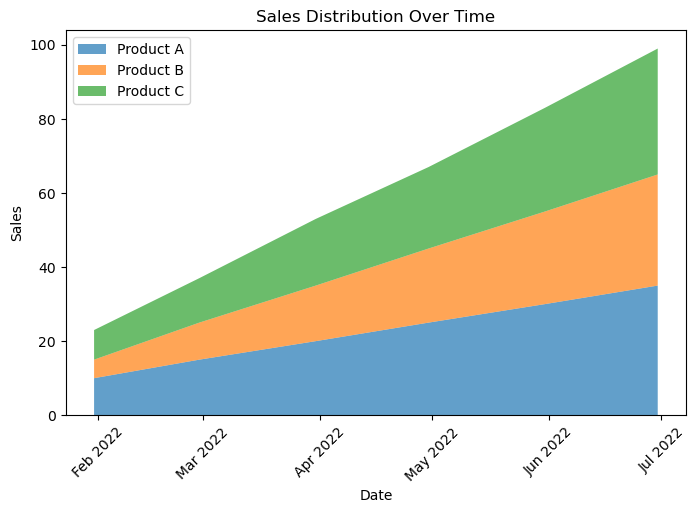

In [2]:
#  Stackplot

# initialise data
dates = pd.date_range(start="2022-01-01", periods=6, freq='ME')
product_A = [10, 15, 20, 25, 30, 35]
product_B = [5, 10, 15, 20, 25, 30]
product_C = [8, 12, 18, 22, 28, 34]

# create stackplot
fig, ax = plt.subplots(figsize=(8, 5))

ax.stackplot(dates, product_A, product_B, product_C, labels=['Product A', 'Product B', 'Product C'],
             colors=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)

# formatting x-axis for dates
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.title("Sales Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="upper left")

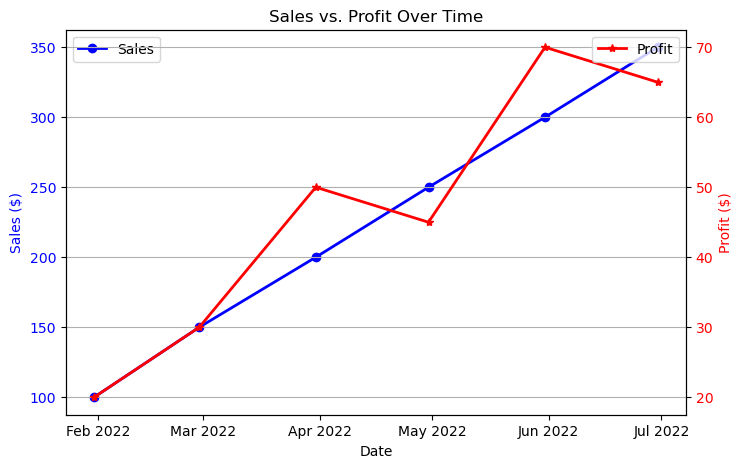

In [3]:
#  Dual Axis example

# Sample Data
dates = pd.date_range(start="2022-01-01", periods=6, freq='ME')
sales = [100, 150, 200, 250, 300, 350]
profit = [20, 30, 50, 45, 70, 65]

# Create Figure and Axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Sales on Primary Y-Axis
ax1.plot(dates, sales, 'bo-', label="Sales", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Sales ($)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create Secondary Y-Axis
ax2 = ax1.twinx()  
ax2.plot(dates, profit, 'r*-', label="Profit", linewidth=2)
ax2.set_ylabel("Profit ($)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Format X-Axis (for Dates)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Sales vs. Profit Over Time")
plt.grid()
plt.show()

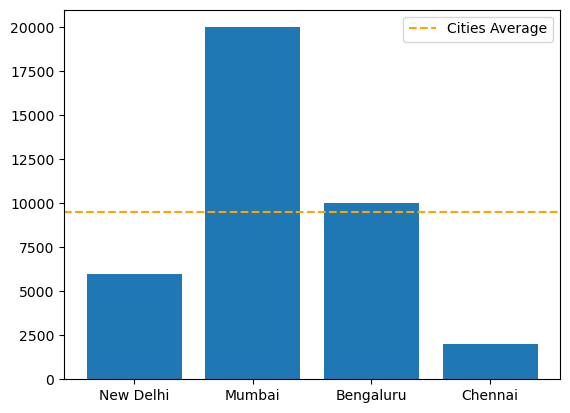

In [4]:
#  bar chart
import statistics as stat

cities = ['New Delhi', 'Mumbai', 'Bengaluru', 'Chennai']
price = [6000, 20000, 10000, 2000]

fig = plt.figure()
ax = fig.add_subplot()

ax.axhline(stat.mean(price), linestyle = '--', color = 'orange', label = 'Cities Average')
ax.bar(cities, price)
ax.legend()

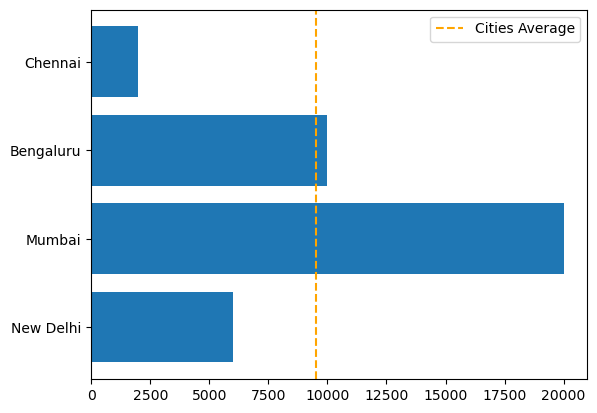

In [5]:
#  horizontal bar chart
import statistics as stat

cities = ['New Delhi', 'Mumbai', 'Bengaluru', 'Chennai']
price = [6000, 20000, 10000, 2000]

fig = plt.figure()
ax = fig.add_subplot()

ax.axvline(stat.mean(price), linestyle = '--', color = 'orange', label = 'Cities Average')
ax.barh(cities, price)
ax.legend()


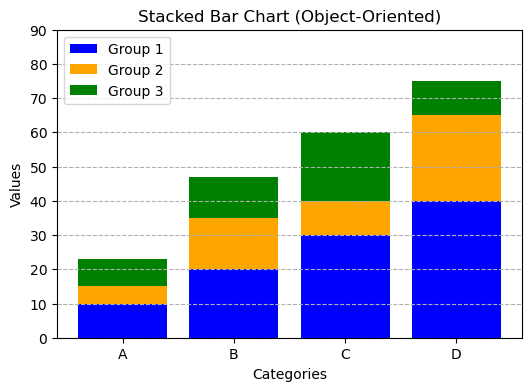

In [6]:
#  stacked bar chart

# Sample data
categories = ['A', 'B', 'C', 'D']
values1 = [10, 20, 30, 40]  # First stack
values2 = [5, 15, 10, 25]   # Second stack
values3 = [8, 12, 20, 10]   # Third stack

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars (stacked)
ax.bar(categories, values1, color='blue', label='Group 1')
ax.bar(categories, values2, bottom=values1, color='orange', label='Group 2')
ax.bar(categories, values3, bottom=np.array(values1) + np.array(values2), color='green', label='Group 3')  # element wise addition in values 1 and 2

# Labels & Title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_ylim(0, 90)
ax.set_title('Stacked Bar Chart (Object-Oriented)')

# Add Legend
ax.legend()
ax.grid(axis = 'y', ls = '--')

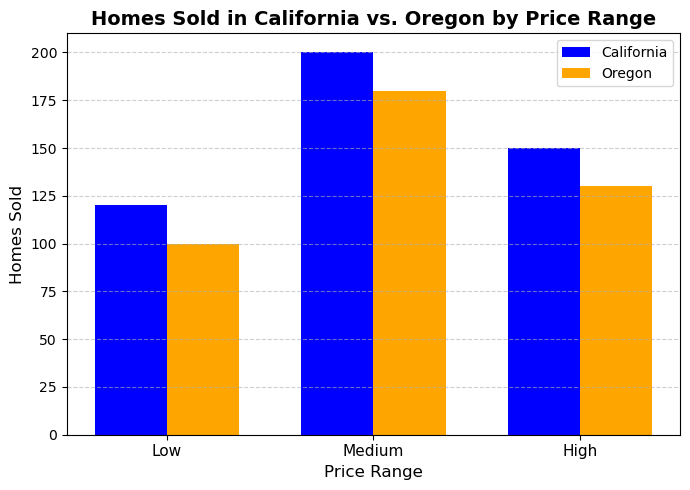

In [7]:
# grouped bar chart

# Sample data
categories = ['Low', 'Medium', 'High']  # Price ranges
california_sales = [120, 200, 150]  # Homes sold in California
oregon_sales = [100, 180, 130]  # Homes sold in Oregon

# X locations for the bars
x = np.arange(len(categories))  # [0, 1, 2]
width = 0.35  # Bar width

# Create Figure and Axis
fig, ax = plt.subplots(figsize=(7, 5))

# Plot bars for California and Oregon
ax.bar(x - width/2, california_sales, width = width, label="California", color="blue")
ax.bar(x + width/2, oregon_sales, width = width, label="Oregon", color="orange")

# Titles and labels
ax.set_title("Homes Sold in California vs. Oregon by Price Range", fontsize=14, fontweight='bold')
ax.set_xlabel("Price Range", fontsize=12)
ax.set_ylabel("Homes Sold", fontsize=12)
ax.set_xticks(x)  # Set category positions
ax.set_xticklabels(categories, fontsize=11)  # Assign category names
ax.legend()

# Improve layout
plt.grid(axis='y', linestyle="--", alpha=0.6)  # Light y-axis grid for readability
plt.tight_layout()  # Adjust layout to fit everything nicely

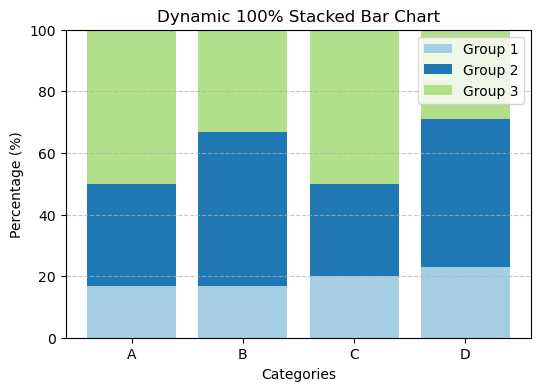

In [8]:
def plot_stacked_bar(categories, values, colors=None):
    """
    Creates a 100% stacked bar chart for dynamic inputs.
    
    :param categories: List of category labels
    :param values: 2D list (or NumPy array) where each row represents a category, and each column represents a group.
    :param colors: List of colors for each group (optional)
    """
    values = np.array(values)  # Convert input list to NumPy array
    totals = values.sum(axis=1, keepdims=True)  # Compute row-wise sum
    percentages = (values / totals) * 100  # Normalize to percentage
    
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Default colors if not provided
    if colors is None:
        colors = plt.cm.Paired.colors[:values.shape[1]]  # Auto-generate colors
    
    bottom = np.zeros(len(categories))  # Start at zero for stacking

    # Plot each group as a stacked bar
    for i in range(values.shape[1]):
        ax.bar(categories, percentages[:, i], bottom=bottom, color=colors[i], label=f'Group {i+1}')
        bottom += percentages[:, i]  # Update bottom for next stack

    # Labels & Title
    ax.set_xlabel('Categories')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 100)
    ax.set_title('Dynamic 100% Stacked Bar Chart')

    # Add grid & legend
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend()

    # Show plot
    plt.show()

# Example Usage
categories = ['A', 'B', 'C', 'D']
values = [
    [10, 20, 30],  # Category A
    [5, 15, 10],   # Category B
    [8, 12, 20],   # Category C
    [12, 25, 15]   # Category D
]

plot_stacked_bar(categories, values)


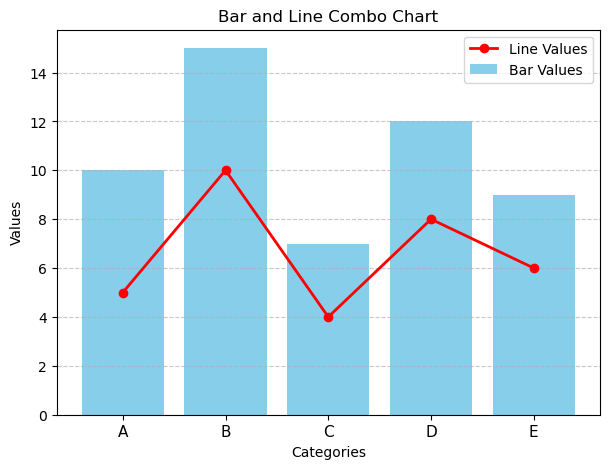

In [9]:
# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
bar_values = [10, 15, 7, 12, 9]  # Bar chart values
line_values = [5, 10, 4, 8, 6]   # Line chart values
x = np.arange(len(categories))  # x positions

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Bar chart
ax.bar(x, bar_values, color='skyblue', label="Bar Values")

# Line chart (secondary plot)
ax.plot(x, line_values, color='red', marker='o', linestyle='-', linewidth=2, label="Line Values")

# Customize x-axis
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=11)

# Labels and title
ax.set_xlabel("Categories")
ax.set_ylabel("Values")
ax.set_title("Bar and Line Combo Chart")

# Grid and legend
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

[]

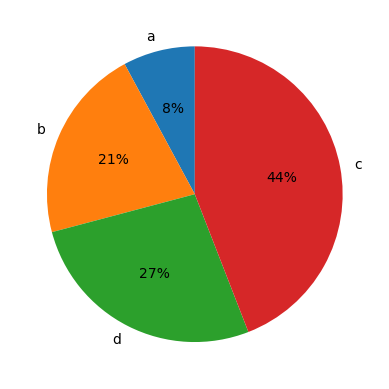

In [10]:
figure = plt.figure()
ax = figure.add_subplot()
data = np.array([1000, 2700, 5600, 3400])
labels = np.array(['a', 'b', 'c', 'd'])

sorted_indices = np.argsort(data)  # Get sorted indices
sorted_data = data[sorted_indices]
sorted_labels = labels[sorted_indices]
ax.pie(x = sorted_data, labels = sorted_labels, startangle = 90, autopct = '%1.0f%%')
ax.plot()

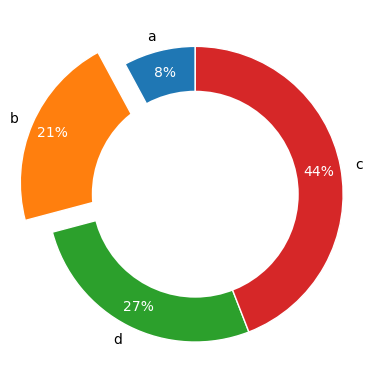

In [11]:
# Data
data = np.array([1000, 2700, 5600, 3400])
labels = np.array(['a', 'b', 'c', 'd'])

# Sorting the data while keeping labels in sync
sorted_indices = np.argsort(data)  # Get sorted indices
sorted_data = data[sorted_indices]
sorted_labels = labels[sorted_indices]

# Create figure and axis
figure = plt.figure()
ax = figure.add_subplot()

# Create a pie chart
wedges, texts, autotexts = ax.pie(
    x=sorted_data, labels=sorted_labels, startangle=90, autopct='%1.0f%%',
    wedgeprops={'edgecolor': 'white'},  # Adds white border between slices
    pctdistance=0.85,  # Moves percentage labels outward
    explode = (0, 0.2, 0, 0),
)

for i in autotexts:
    i.set_color('white')

# Create a white circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.7, fc='white')  # Adjust radius for the hole size
ax.add_artist(centre_circle)  # Add the circle to the pie chart

# Set aspect ratio to equal so it remains circular
ax.set_aspect('equal')

# Show plot
plt.show()


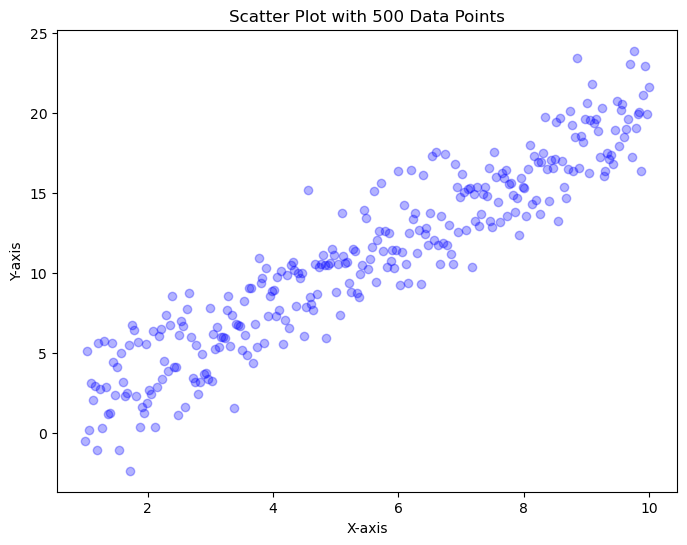

In [12]:
# Generate random data with stronger correlation
np.random.seed(30)
x = np.linspace(1, 10, 300)  # 500 X values from 1 to 10
y = 2 * x + np.random.normal(0, 2, 300)  # Y values with some noise

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot with transparency (alpha)
ax.scatter(x, y, color='blue', alpha=0.3)  # use size for extra variabe to make bubble chart

# Labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with 500 Data Points')

# Show plot
plt.show()

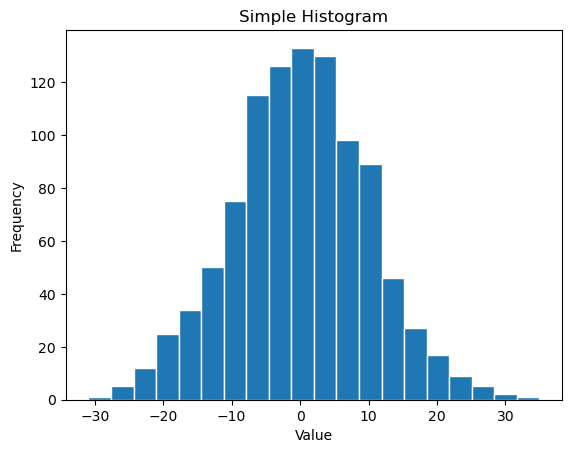

In [13]:
# Sample data
data = np.random.randn(1000) * 10  # 1000 random values from a normal distribution

# Create figure and axis
fig, ax = plt.subplots()

# Plot histogram
ax.hist(data, bins=20, edgecolor='white')

# Labels
ax.set_title("Simple Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# Show plot
plt.show()


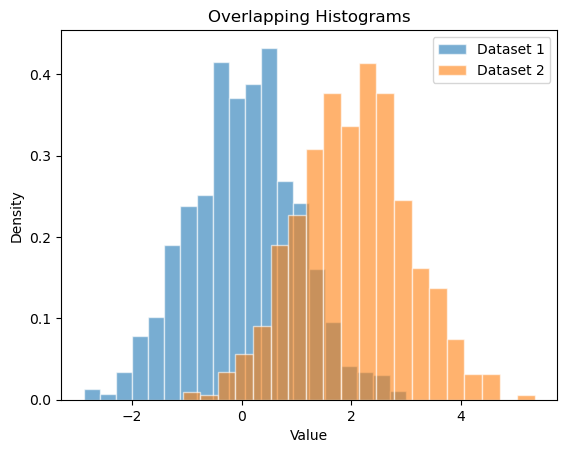

In [14]:
# Sample data
data1 = np.random.randn(1000)  # Normal distribution
data2 = np.random.randn(1000) + 2  # Shifted normal distribution

# Create figure and axis
fig, ax = plt.subplots()

# Plot histograms
ax.hist(data1, bins=20, density=True, alpha=0.6, edgecolor='white', label="Dataset 1")
ax.hist(data2, bins=20, density=True, alpha=0.6, edgecolor='white', label="Dataset 2")

# Labels and legend
ax.set_title("Overlapping Histograms")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.legend()

# Show plot
plt.show()


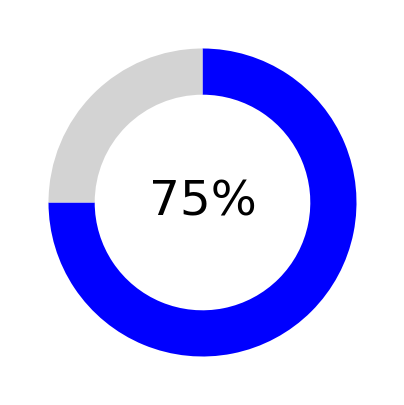

In [17]:
# Progress value (percentage)
progress = 75  # Change this to any value (0-100)

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Donut chart (progress in blue, remaining in light gray)
ax.pie([progress, 100 - progress], 
       colors=['blue', 'lightgray'], 
       startangle=90, 
       wedgeprops={'width': 0.3}, 
        counterclock=False
)

# Add text in the center
ax.text(0, 0, f"{progress}%", ha='center', va='center', fontsize=35, color='black')

# Remove axis labels
ax.set_aspect('equal')  
ax.set_xticks([])
ax.set_yticks([])

# Show plot
plt.show()
